<a href="https://colab.research.google.com/github/verryp/dts-deep-learning-project/blob/dev/Final_Project_DTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential # Jenis Model
from tensorflow.keras.layers import Dense #Sebuah lapisan untuk MLP -> bisa berupa layer input,hidden, ataupun output
from tensorflow.keras.utils import to_categorical #Mengubah label 0-9 menjadi representasi yang bisa diproses oleh keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.examples.tutorials.mnist import input_data #Dataset fashion mnist dari keras

## Fashion MNIST data set

Klasifikasi gambar digunakan dalam beberapa aplikasi, mulai dari mengenali penyakin
yang mengancam jiwa dalam pemindaian medis, hingga mendeteksi


Dataset MNIST (bisa dibilang) adalah dataset yang paling sering digunakan sebagai
permulaan pembelajaran klasifikasi gambar. Komunitas data saintis menyukai dataset ini
dan menggunakannya sebagai tolak ukur untuk memvalidasi algoritma mereka. Faktanya,
MNIST seringkali menjadi dataset pertama para peneliti yang dicoba.



  >    "Jika algoritmanya tidak bisa bekerja pada MNIST, algoritma tersebut pasti tidak akan bisa bekerja untuk dataset lainnya. Jika algoritmanya bekerja pada MNIST, permulaan yang bagus, namun bukan berarti dapat bekerja untuk dataset lainnya."
  
  
Peneliti dari Zalando (sebuah perusahaan e-commerce) telah mengembangkan dataset
klasifikasi gambar baru yang disebut dengan Fashion MNIST dengan harapan dapat
menggantikan MNIST. Dataset baru ini berisi gambar baju dan aksesoris, seperti: kemeja,
tas, sepatu, dan barang mode lainnya.

Fashion MNIST berisi 55,000 training set dan 10,000 test set. Serupa dengan MNIST, setiap
data Fashion MNIST merupakan sebuah gambar skala abu (grayscale) berukuran 28x28
pixel. Masing-masing data memiliki label asosiasinya yang terdiri dari 10 kelas

Label|Description|Label|Description
--- | --- |--- | ---
0|T-shirt/top|5|Sandal
1|Trouser|6|Shirt
2|Pullover|7|Sneaker
3|Dress|8|Bag
4|Coat|9|Ankle boot

## Download Dataset

In [0]:
!mkdir data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

mkdir: cannot create directory ‘data/fashion’: File exists
--2019-08-17 09:07:09--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.62
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.73.62|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  16.7MB/s    in 1.5s    

2019-08-17 09:07:11 (16.7 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-08-17 09:07:12--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazo

## Import Dataset

In [0]:
# Import Fashion MNIST
fashion_mnist = input_data.read_data_sets('data/fashion')

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


## Bentuk Dataset

In [0]:
# Shapes of training set
x_train, y_train = fashion_mnist.train.images, fashion_mnist.train.labels

print("Training set (images) shape: {shape}".format(shape=x_train.shape))
print("Training set (labels) shape: {shape}".format(shape=y_train.shape))

# Shapes of test set
x_test, y_test = fashion_mnist.test.images, fashion_mnist.test.labels
print("\nTest set (images) shape: {shape}".format(shape=x_test.shape))
print("Test set (labels) shape: {shape}".format(shape=y_test.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000,)

Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000,)


## Akses data pada Dataset

Random 10 image dari data training : 


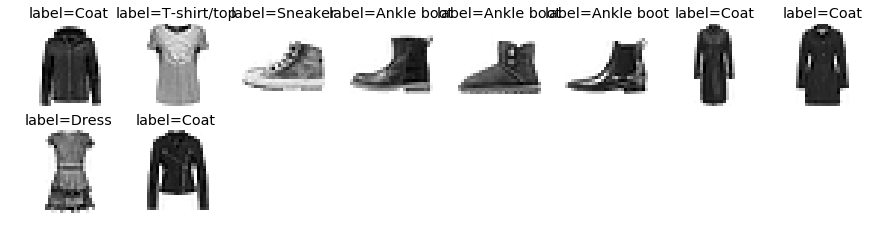

In [0]:
# Set label dalam bentuk huruf -> agar bisa dibaca dengan baik
class_names = {0:'T-shirt/top',
                  1:'Trouser',
                  2:'Pullover',
                  3:'Dress',
                  4:'Coat',
                  5:'Sandal',
                  6:'Shirt',
                  7:'Sneaker',
                  8:'Bag',
                  9:'Ankle boot'}

# proses menampilkan data dengan bantuan lib matplotlib
print("Random 10 image dari data training : ")
plt.figure(figsize=(15,10))
for i in range(10):  
    plt.subplot(5, 8, i+1)
    plt.imshow(x_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("label=%s" % class_names[y_train[i]],y=1)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()

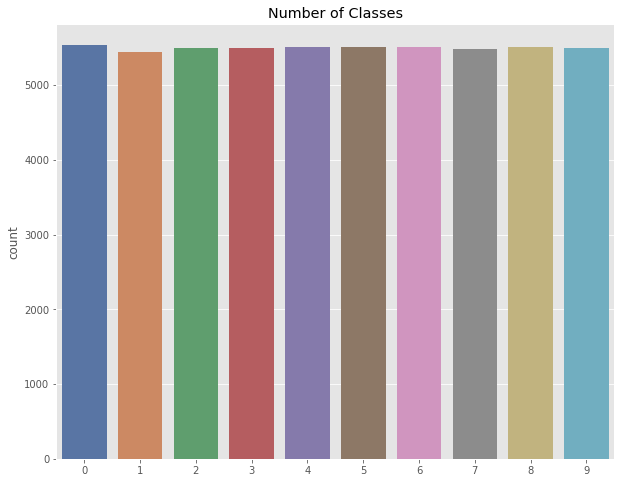

In [0]:
import seaborn as sns

# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 8))
sns.countplot(y_train, palette="deep")
# sns.scatterplot(x='total data', y='label', data=x_train)
plt.title("Number of Classes")
plt.show()

In [0]:
# print(x_train.isnull().sum().sum())
# print(x_test.isnull().sum().sum())
# x_train.head()

In [0]:
# preprocesssing data

# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('x_train shape : ', x_train.shape)
print('Banyak gambar di x_train : ', x_train.shape[0])

print('Banyak gambar di x_test', x_test.shape[0])

x_train shape :  (55000, 28, 28, 1)
Banyak gambar di x_train :  55000
Banyak gambar di x_test 10000


In [0]:
input_shape = (28, 28, 1)
adam = Adam(lr=0.001)

# ==========================================================BAGAIN PERTAMA========================================================
# Membuat model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', strides=1, input_shape=input_shape))
# Conv2D
# - filters = jumlah node. mirip seperti Dense
# - kernel_size = jumlah node yang bergeser. 2 artinya matrik 2x2
# - strides = bergesernya pixel ke kanan sebanyak 1 kolom
# - padding = merupakan garis putus (sisa/tambahan pixel dari hasil stride) untuk membantu proses perhitungan
#       => value 'same' artinya padding akan diberikan sebagaimana hasil proses perhitungan sama dengan input 
#       => input 28x28x1 maka menjadi 28x28x64. 28x28 tidak berubah karena 'same'

model.add(MaxPooling2D(pool_size=2))
# MaxPooling2D
# - untuk memperkecil ukuran dari Conv2D dengan cara mengambil angka tersebar untuk setiap setingan pixel matrik dalam hal ini 2x2 dalam setiap proses
# - dapat mencegah overfitting

model.add(Flatten())
# Flatten
# - meratakan semua output dari layer sebelumnya sehingga bisa diproses menggunakan Dense
# - hasil output MaxPool adalah 14x14x64 dan flatten akan meratakan menjadi 12.544 sel
model.add(Dense(10, activation='softmax'))


# ==========================================================BAGAIN KEDUA========================================================
# model = Sequential()
# model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
#                  activation ='relu', input_shape = (28,28,1)))
# model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(Dropout(0.35))
# model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Dense(units = 256, activation = 'relu'))
# model.add(Dropout(0.4))
# model.add(Dense(units = 10, activation = 'softmax'))

# ==========================================================BAGAIN KETIGA========================================================
# from keras.layers.normalization import BatchNormalization

# batch_size = 256
# num_classes = 10
# epochs = 50

# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  kernel_initializer='he_normal',
#                  input_shape=input_shape))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Dropout(0.4))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 3, 3, 128)       

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# model.compile(
#     optimizer = 'rmsprop',
#     loss = 'categorical_crossentropy',
#     metrics = ['accuracy']
# )



# menggunakan TensorBoard
callbacks = TensorBoard(log_dir='./Graph')

# TRAINING

# Training data dengan 10 epochs dan menggunakan TensorBoard Callback
history = model.fit(x_train, y_train, epochs=50, validation_split=0.1, batch_size=256, validation_data=(x_test, y_test))

# Menyimpan Weights
model.save_weights('weights.h5')


Train on 55000 samples, validate on 10000 samples
Epoch 1/50
55000/55000 [==============================] - 3s 51us/sample - loss: 1.2073 - acc: 0.5459 - val_loss: 0.7884 - val_acc: 0.7051
Epoch 2/50
55000/55000 [==============================] - 2s 37us/sample - loss: 0.7976 - acc: 0.6972 - val_loss: 0.6914 - val_acc: 0.7303
Epoch 3/50
55000/55000 [==============================] - 2s 37us/sample - loss: 0.7146 - acc: 0.7277 - val_loss: 0.6303 - val_acc: 0.7665
Epoch 4/50
55000/55000 [==============================] - 2s 37us/sample - loss: 0.6552 - acc: 0.7480 - val_loss: 0.5869 - val_acc: 0.7769
Epoch 5/50
55000/55000 [==============================] - 2s 37us/sample - loss: 0.6164 - acc: 0.7639 - val_loss: 0.5599 - val_acc: 0.7842
Epoch 6/50
55000/55000 [==============================] - 2s 38us/sample - loss: 0.5862 - acc: 0.7769 - val_loss: 0.5250 - val_acc: 0.7986
Epoch 7/50
55000/55000 [==============================] - 2s 37us/sample - loss: 0.5600 - acc: 0.7871 - val_loss: 0.

## Evaluasi

Accuracy after fitting: 88.69%
10000/10000 [==============================] - 1s 87us/sample - loss: 0.2805 - acc: 0.8980

Test Accurary : 89.80%
Test Lost : 0.281


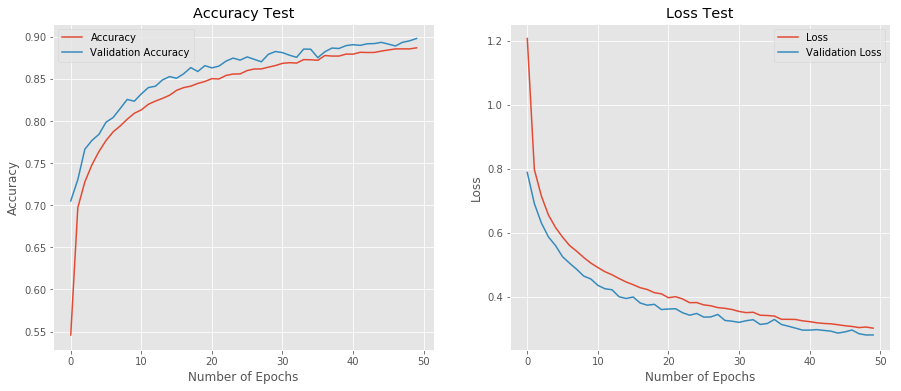

In [0]:
print("Accuracy after fitting: {:.2f}%".format(history.history['acc'][-1]*100))

score = model.evaluate(x_test, y_test)
print('\nTest Accurary : {:.2f}%'.format(score[1]*100))
print('Test Lost : {:.3f}'.format(score[0]) )


# #EVALUATING - VISUALISASI HASIL
plt.figure(figsize=(15,6))

plt.subplot(1,2,2)
plt.title('Loss Test')
plt.plot(history.history['loss'], label = "Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.subplot(1,2,1)
plt.title('Accuracy Test')
plt.plot(history.history['acc'], label = "Accuracy")
plt.plot(history.history['val_acc'], label = "Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()
plt.show()

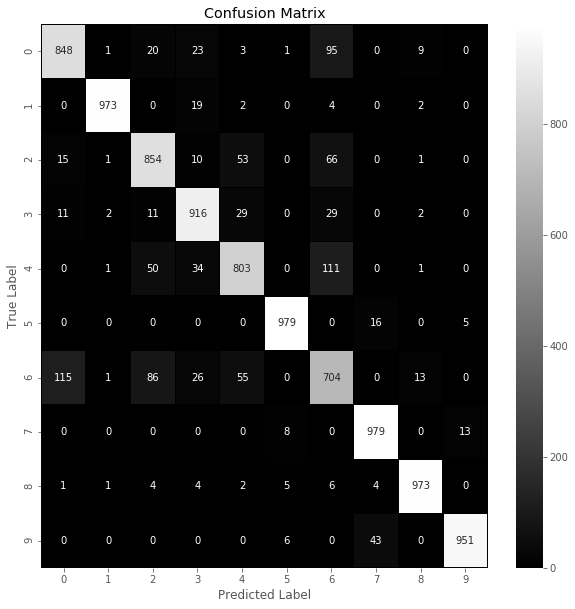



Class: T-shirt/top
Number of Correct Prediction: 848 out of  10000
Number of Wrong Prediction: 152 out of  10000

Class: Trouser
Number of Correct Prediction: 973 out of  10000
Number of Wrong Prediction: 27 out of  10000

Class: Pullover
Number of Correct Prediction: 854 out of  10000
Number of Wrong Prediction: 146 out of  10000

Class: Dress
Number of Correct Prediction: 916 out of  10000
Number of Wrong Prediction: 84 out of  10000

Class: Coat
Number of Correct Prediction: 803 out of  10000
Number of Wrong Prediction: 197 out of  10000

Class: Sandal
Number of Correct Prediction: 979 out of  10000
Number of Wrong Prediction: 21 out of  10000

Class: Shirt
Number of Correct Prediction: 704 out of  10000
Number of Wrong Prediction: 296 out of  10000

Class: Sneaker
Number of Correct Prediction: 979 out of  10000
Number of Wrong Prediction: 21 out of  10000

Class: Bag
Number of Correct Prediction: 973 out of  10000
Number of Wrong Prediction: 27 out of  10000

Class: Ankle boot
Nu

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Plot Confusion Matrix
prediction = model.predict(x_test)
Y_pred_classes = np.argmax(prediction, axis = 1)
Y_true = np.argmax(y_test, axis = 1)
confusionMatrix = confusion_matrix(Y_true, Y_pred_classes)


f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusionMatrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


print('\n', '=='*70)

# For loop to print how many items of each class have been incorrectly estimated
for i in range(len(confusionMatrix)):
    print("\nClass:",str(class_names[i]))
    print("Number of Correct Prediction:", str(confusionMatrix[i][i]), "out of ", len(x_test))
    print("Number of Wrong Prediction:", str(sum(confusionMatrix[i])-confusionMatrix[i][i]), "out of ", len(x_test))
    

print('\n','=='*70)

print('\nClassification accuracy for each class:');
for i,j in enumerate(confusionMatrix.diagonal()/confusionMatrix.sum(axis=1)): print(str(class_names[i]), ': %.4f' % j)

[INFO] evaluating network...
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.87      0.88      0.88      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.82      0.88      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.75      0.68      0.71      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



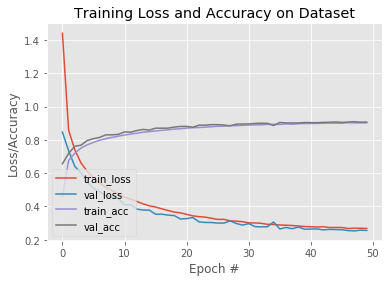

In [0]:
# print(classification_report(y_test, prediction))
# accuracy = accuracy_score(y_test, prediction)
# average_accuracy = np.mean(y_test == prediction) * 100
# print("The average_accuracy is {0:.1f}%".format(average_accuracy))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("[INFO] evaluating network...")
print(classification_report(y_test.argmax(axis=1), prediction.argmax(axis=1),
	target_names=class_names))

# plot the training loss and accuracy
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

## Sumber

1.   https://github.com/zalandoresearch/fashion-mnist
2.   https://medium.com/tensorist/classifying-fashion-articles-using-tensorflow-fashion-mnist-f22e8a04728a

